# 미세먼지 수치 시각화 (서울 특별시 기준)

- https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123 
- 자료 출처 : 에어코리아 -> 통계정보 -> 확정자료 다운로드 -> 최종확정자료 연도별 다운로드 -> 2021년(1월~12월)

## 측정항목
- SO2 = 산소포화량	
- CO  = 일산화탄소
- O3 = 오존	
- NO2 = 이산화질소	
- PM10 = 미세먼지	
- PM25 = 초미세먼지

### 목표
- 서울 특별시의 미세먼지가 월마다 차이가 있는지 확인하기
- 미세먼지가 가장 많은 월에 시간마다 차이가 있는지 확인하기

In [1]:
# 라이브러리 로드하기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_9136\2863771375.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
# 1월~6월 파일 로드
df_1 = pd.read_csv("Data/미세먼지/2021년 1월.csv", encoding='utf-8')
df_2 = pd.read_csv("Data/미세먼지/2021년 2월.csv", encoding='utf-8')
df_3 = pd.read_csv("Data/미세먼지/2021년 3월.csv", encoding='utf-8')
df_4 = pd.read_csv("Data/미세먼지/2021년 4월.csv", encoding='utf-8')
df_5 = pd.read_csv("Data/미세먼지/2021년 5월.csv", encoding='utf-8')
df_6 = pd.read_csv("Data/미세먼지/2021년 6월.csv", encoding='utf-8')

In [4]:
# 7월~12월 파일 로드
df_7 = pd.read_csv("Data/미세먼지/2021년 7월.csv", encoding='utf-8')
df_8 = pd.read_csv("Data/미세먼지/2021년 8월.csv", encoding='utf-8')
df_9 = pd.read_csv("Data/미세먼지/2021년 9월.csv", encoding='utf-8')
df_10 = pd.read_csv("Data/미세먼지/2021년 10월.csv", encoding='utf-8')
df_11 = pd.read_csv("Data/미세먼지/2021년 11월.csv", encoding='utf-8')
df_12 = pd.read_csv("Data/미세먼지/2021년 12월.csv", encoding='utf-8')

In [5]:
# 요약하기
df_1.describe() 

,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,4.373490e+05,417632.000000,415669.000000,418339.000000,420080.000000,416980.000000,414176.000000
mean,2.021012e+09,0.003292,0.512039,0.021843,0.020624,39.051823,20.495338
std,8.945759e+02,0.001829,0.238469,0.013379,0.015105,26.119573,13.115116
min,2.021010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.021011e+09,0.002000,0.400000,0.009000,0.009000,21.000000,11.000000
50%,2.021012e+09,0.003000,0.500000,0.023000,0.016000,32.000000,17.000000
75%,2.021012e+09,0.004000,0.600000,0.033000,0.029000,49.000000,28.000000
max,2.021013e+09,0.146000,6.700000,0.089000,0.200000,462.000000,199.000000


In [6]:
df_1.head()

,지역,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,서울 중구,2021010101,0.003,0.4,0.020,0.018,27.0,14.0
1,서울 중구,2021010102,0.003,0.5,0.017,0.021,26.0,14.0
2,서울 중구,2021010103,0.003,0.5,0.014,0.026,25.0,16.0
3,서울 중구,2021010104,0.003,0.4,0.021,0.018,22.0,13.0
4,서울 중구,2021010105,0.003,0.5,0.010,0.029,25.0,13.0


In [7]:
df_1.isnull().sum()

지역          0
측정일시        0
SO2     19717
CO      21680
O3      19010
NO2     17269
PM10    20369
PM25    23173
dtype: int64

In [8]:
# 결측치
df_1 = df_1.fillna(0)
df_2 = df_2.fillna(0)
df_3 = df_3.fillna(0)
df_4 = df_4.fillna(0)
df_5 = df_5.fillna(0)
df_6 = df_6.fillna(0)
df_7 = df_7.fillna(0)
df_8 = df_8.fillna(0)
df_9 = df_9.fillna(0)
df_10 = df_10.fillna(0)
df_11 = df_11.fillna(0)
df_12 = df_12.fillna(0)

### 측정일시 년,월,일로 나누기

- 2021010101 -> 2021-01-01-01시 으로 변경

### datetime 라이브러리 사용하기

- 날짜를 변경하는 이유 : 날짜 형태가 숫자로 되어있는데 날짜별로 미세먼지의 수치를 시각화하기 위해서 날짜형식을 변경해야한다.

##### 변경방법
1. df_time에 날짜가 들어있는 df["측정일시"]를 넣는다.
2. str 문자형식으로 변경한다.
3. 뒤에 0000을 더해준다. (문자 더하기)
4. 24시는 오류가 뜨기 때문에 24시를 00시로 바꾸어준다.
5. datetime / strftime을 이용하여 날짜형식으로 변경한다. (%Y-%m-%d-%H시)

##### 문자열 변경시 str(df_time)을 사용하면 안되는 이유

- str(df_time)은 행 전체를 문자로 변환해 준다.
- 예). df_time = ("123", "456", "789", "012") 이렇게 있으면 -> "123456789012" 이렇게 통째로 문자열이 되어버린다.

In [9]:
# 서울이 들어간 지역만 뽑아서 넣기
df_seoul_1 = df_1[df_1["지역"].str.contains("서울")].copy()
df_seoul_2 = df_2[df_2["지역"].str.contains("서울")].copy()
df_seoul_3 = df_3[df_3["지역"].str.contains("서울")].copy()
df_seoul_4 = df_4[df_4["지역"].str.contains("서울")].copy()
df_seoul_5 = df_5[df_5["지역"].str.contains("서울")].copy()
df_seoul_6 = df_6[df_6["지역"].str.contains("서울")].copy()
df_seoul_7 = df_7[df_7["지역"].str.contains("서울")].copy()
df_seoul_8 = df_8[df_8["지역"].str.contains("서울")].copy()
df_seoul_9 = df_9[df_9["지역"].str.contains("서울")].copy()
df_seoul_10 = df_10[df_10["지역"].str.contains("서울")].copy()
df_seoul_11 = df_11[df_11["지역"].str.contains("서울")].copy()
df_seoul_12 = df_12[df_12["지역"].str.contains("서울")].copy()

In [10]:
# 지역에서 서울 빼기
# 모두 공통으로 들어가있으므로 없어도 되는 문자이다.
df_seoul_1['지역'] = df_seoul_1['지역'].str.replace("서울","")
df_seoul_2['지역'] = df_seoul_2['지역'].str.replace("서울","")
df_seoul_3['지역'] = df_seoul_3['지역'].str.replace("서울","")
df_seoul_4['지역'] = df_seoul_4['지역'].str.replace("서울","")
df_seoul_5['지역'] = df_seoul_5['지역'].str.replace("서울","")
df_seoul_6['지역'] = df_seoul_6['지역'].str.replace("서울","")
df_seoul_7['지역'] = df_seoul_7['지역'].str.replace("서울","")
df_seoul_8['지역'] = df_seoul_8['지역'].str.replace("서울","")
df_seoul_9['지역'] = df_seoul_9['지역'].str.replace("서울","")
df_seoul_10['지역'] = df_seoul_10['지역'].str.replace("서울","")
df_seoul_11['지역'] = df_seoul_11['지역'].str.replace("서울","")
df_seoul_12['지역'] = df_seoul_12['지역'].str.replace("서울","")

In [11]:
# 측정일시 df_time 변수에 따로 담아주기
df_time_1 = df_seoul_1["측정일시"]
df_time_2 = df_seoul_2["측정일시"]
df_time_3 = df_seoul_3["측정일시"]
df_time_4 = df_seoul_4["측정일시"]
df_time_5 = df_seoul_5["측정일시"]
df_time_6 = df_seoul_6["측정일시"]
df_time_7 = df_seoul_7["측정일시"]
df_time_8 = df_seoul_8["측정일시"]
df_time_9 = df_seoul_9["측정일시"]
df_time_10 = df_seoul_10["측정일시"]
df_time_11 = df_seoul_11["측정일시"]
df_time_12 = df_seoul_12["측정일시"]

In [12]:
# df_time 문자로 변환해주기 
df_time_1 = df_time_1.astype('str')
df_time_2 = df_time_2.astype('str')
df_time_3 = df_time_3.astype('str')
df_time_4 = df_time_4.astype('str')
df_time_5 = df_time_5.astype('str')
df_time_6 = df_time_6.astype('str')
df_time_7 = df_time_7.astype('str')
df_time_8 = df_time_8.astype('str')
df_time_9 = df_time_9.astype('str')
df_time_10 = df_time_10.astype('str')
df_time_11 = df_time_11.astype('str')
df_time_12 = df_time_12.astype('str')

In [13]:
# df_time 문자로 변환해주기 
df_time_1 = df_time_1.astype('str')
df_time_2 = df_time_2.astype('str')
df_time_3 = df_time_3.astype('str')
df_time_4 = df_time_4.astype('str')
df_time_5 = df_time_5.astype('str')
df_time_6 = df_time_6.astype('str')
df_time_7 = df_time_7.astype('str')
df_time_8 = df_time_8.astype('str')
df_time_9 = df_time_9.astype('str')
df_time_10 = df_time_10.astype('str')
df_time_11 = df_time_11.astype('str')
df_time_12 = df_time_12.astype('str')

In [14]:
# 뒤에 000붙여주기
# datetime을 사용하기 위해서 붙여주기
# 2021010101 -> 2021-01-01-01
time = '0000'
df_time_1 = df_time_1 + time
df_time_2 = df_time_2 + time
df_time_3 = df_time_3 + time
df_time_4 = df_time_4 + time
df_time_5 = df_time_5 + time
df_time_6 = df_time_6 + time
df_time_7 = df_time_7 + time
df_time_8 = df_time_8 + time
df_time_9 = df_time_9 + time
df_time_10 = df_time_10 + time
df_time_11 = df_time_11 + time
df_time_12 = df_time_12 + time

In [15]:
# 24시를 00시로 바꾸어 주기
# 240000은 오류발생
df_time_1 = df_time_1.str.replace('240000','000000')
df_time_2 = df_time_2.str.replace('240000','000000')
df_time_3 = df_time_3.str.replace('240000','000000')
df_time_4 = df_time_4.str.replace('240000','000000')
df_time_5 = df_time_5.str.replace('240000','000000')
df_time_6 = df_time_6.str.replace('240000','000000')
df_time_7 = df_time_7.str.replace('240000','000000')
df_time_8 = df_time_8.str.replace('240000','000000')
df_time_9 = df_time_9.str.replace('240000','000000')
df_time_10 = df_time_10.str.replace('240000','000000')
df_time_11 = df_time_11.str.replace('240000','000000')
df_time_12 = df_time_12.str.replace('240000','000000')

In [16]:
import datetime

df_seoul_1['date'] = pd.to_datetime(df_time_1).dt.strftime('%Y-%m-%d-%H')
df_seoul_2['date'] = pd.to_datetime(df_time_2).dt.strftime('%Y-%m-%d-%H')
df_seoul_3['date'] = pd.to_datetime(df_time_3).dt.strftime('%Y-%m-%d-%H')
df_seoul_4['date'] = pd.to_datetime(df_time_4).dt.strftime('%Y-%m-%d-%H')
df_seoul_5['date'] = pd.to_datetime(df_time_5).dt.strftime('%Y-%m-%d-%H')
df_seoul_6['date'] = pd.to_datetime(df_time_6).dt.strftime('%Y-%m-%d-%H')
df_seoul_7['date'] = pd.to_datetime(df_time_7).dt.strftime('%Y-%m-%d-%H')
df_seoul_8['date'] = pd.to_datetime(df_time_8).dt.strftime('%Y-%m-%d-%H')
df_seoul_9['date'] = pd.to_datetime(df_time_9).dt.strftime('%Y-%m-%d-%H')
df_seoul_10['date'] = pd.to_datetime(df_time_10).dt.strftime('%Y-%m-%d-%H')
df_seoul_11['date'] = pd.to_datetime(df_time_11).dt.strftime('%Y-%m-%d-%H')
df_seoul_12['date'] = pd.to_datetime(df_time_12).dt.strftime('%Y-%m-%d-%H')

In [17]:
df_seoul_1['date'].isnull().sum()

0

In [18]:
# 일별 분리해주는 함수
def parse_day(date):
    day = date.split("-")[2]
    # day = date.year()
    day = int(day)
    return day

In [19]:
# 시간 따로 분리해주는 함수
def parse_time(date):
    time = date.split("-")[3]
    # time = int(time)
    return time

In [20]:
# 월별 따로 분리해주는 함수
def parse_month(date):
    month = date.split("-")[1]
    return month

In [21]:
# 일만 넣기 -> 일별로 평균을 구해서 도표그릴 예정
df_seoul_1["일"] = df_seoul_1["date"].apply(parse_day)
df_seoul_2["일"] = df_seoul_2["date"].apply(parse_day)
df_seoul_3["일"] = df_seoul_3["date"].apply(parse_day)
df_seoul_4["일"] = df_seoul_4["date"].apply(parse_day)
df_seoul_5["일"] = df_seoul_5["date"].apply(parse_day)
df_seoul_6["일"] = df_seoul_6["date"].apply(parse_day)
df_seoul_7["일"] = df_seoul_7["date"].apply(parse_day)
df_seoul_8["일"] = df_seoul_8["date"].apply(parse_day)
df_seoul_9["일"] = df_seoul_9["date"].apply(parse_day)
df_seoul_10["일"] = df_seoul_10["date"].apply(parse_day)
df_seoul_11["일"] = df_seoul_11["date"].apply(parse_day)
df_seoul_12["일"] = df_seoul_12["date"].apply(parse_day)

In [22]:
# 시간만 넣기 -> 시간별로 평균을 구해서 도표그릴 예정
df_seoul_1["시간"] = df_seoul_1["date"].apply(parse_time)
df_seoul_2["시간"] = df_seoul_2["date"].apply(parse_time)
df_seoul_3["시간"] = df_seoul_3["date"].apply(parse_time)
df_seoul_4["시간"] = df_seoul_4["date"].apply(parse_time)
df_seoul_5["시간"] = df_seoul_5["date"].apply(parse_time)
df_seoul_6["시간"] = df_seoul_6["date"].apply(parse_time)
df_seoul_7["시간"] = df_seoul_7["date"].apply(parse_time)
df_seoul_8["시간"] = df_seoul_8["date"].apply(parse_time)
df_seoul_9["시간"] = df_seoul_9["date"].apply(parse_time)
df_seoul_10["시간"] = df_seoul_10["date"].apply(parse_time)
df_seoul_11["시간"] = df_seoul_11["date"].apply(parse_time)
df_seoul_12["시간"] = df_seoul_12["date"].apply(parse_time)

In [23]:
# 월별
df_seoul_1["월"] = df_seoul_1["date"].apply(parse_month)
df_seoul_2["월"] = df_seoul_2["date"].apply(parse_month)
df_seoul_3["월"] = df_seoul_3["date"].apply(parse_month)
df_seoul_4["월"] = df_seoul_4["date"].apply(parse_month)
df_seoul_5["월"] = df_seoul_5["date"].apply(parse_month)
df_seoul_6["월"] = df_seoul_6["date"].apply(parse_month)
df_seoul_7["월"] = df_seoul_7["date"].apply(parse_month)
df_seoul_8["월"] = df_seoul_8["date"].apply(parse_month)
df_seoul_9["월"] = df_seoul_9["date"].apply(parse_month)
df_seoul_10["월"] = df_seoul_10["date"].apply(parse_month)
df_seoul_11["월"] = df_seoul_11["date"].apply(parse_month)
df_seoul_12["월"] = df_seoul_12["date"].apply(parse_month)

In [24]:
df_seoul_1.head()

,지역,측정일시,SO2,CO,O3,NO2,PM10,PM25,date,일,시간,월
0,중구,2021010101,0.003,0.4,0.020,0.018,27.0,14.0,2021-01-01-01,1,01,01
1,중구,2021010102,0.003,0.5,0.017,0.021,26.0,14.0,2021-01-01-02,1,02,01
2,중구,2021010103,0.003,0.5,0.014,0.026,25.0,16.0,2021-01-01-03,1,03,01
3,중구,2021010104,0.003,0.4,0.021,0.018,22.0,13.0,2021-01-01-04,1,04,01
4,중구,2021010105,0.003,0.5,0.010,0.029,25.0,13.0,2021-01-01-05,1,05,01


In [25]:
columns = ["지역", "SO2", "CO", "O3", "NO2", "PM10", "PM25", "월", "일", "시간"]

df_January = df_seoul_1[columns].copy()
df_February = df_seoul_2[columns].copy()
df_March = df_seoul_3[columns].copy()
df_april = df_seoul_4[columns].copy()
df_May = df_seoul_5[columns].copy()
df_June = df_seoul_6[columns].copy()
df_July = df_seoul_7[columns].copy()
df_August = df_seoul_8[columns].copy()
df_September = df_seoul_9[columns].copy()
df_October = df_seoul_10[columns].copy()
df_November = df_seoul_11[columns].copy()
df_December = df_seoul_12[columns].copy()
df_January.head()

,지역,SO2,CO,O3,NO2,PM10,PM25,월,일,시간
0,중구,0.003,0.4,0.020,0.018,27.0,14.0,01,1,01
1,중구,0.003,0.5,0.017,0.021,26.0,14.0,01,1,02
2,중구,0.003,0.5,0.014,0.026,25.0,16.0,01,1,03
3,중구,0.003,0.4,0.021,0.018,22.0,13.0,01,1,04
4,중구,0.003,0.5,0.010,0.029,25.0,13.0,01,1,05


In [27]:
df_compare = pd.concat([df_January,df_February,df_March,df_april,df_May,df_June,df_July,df_August,df_September
                       ,df_October,df_November,df_December])

df_compare = df_compare.reset_index(drop=True)
df_compare.head(12)

,지역,SO2,CO,O3,NO2,PM10,PM25,월,일,시간
0,중구,0.003,0.4,0.020,0.018,27.0,14.0,01,1,01
1,중구,0.003,0.5,0.017,0.021,26.0,14.0,01,1,02
2,중구,0.003,0.5,0.014,0.026,25.0,16.0,01,1,03
3,중구,0.003,0.4,0.021,0.018,22.0,13.0,01,1,04
4,중구,0.003,0.5,0.010,0.029,25.0,13.0,01,1,05
5,중구,0.003,0.6,0.005,0.036,27.0,16.0,01,1,06
6,중구,0.003,0.6,0.002,0.043,31.0,19.0,01,1,07
7,중구,0.003,0.6,0.002,0.042,33.0,19.0,01,1,08
8,중구,0.003,0.7,0.004,0.044,32.0,20.0,01,1,09
9,중구,0.004,0.8,0.005,0.044,35.0,21.0,01,1,10


In [63]:
# 월별로 대기오염물질 평균 구하기
df_month_pm10 = df_compare.groupby(["월"])["PM10"].mean().round(2)
df_month_pm10 = df_month_pm10.reset_index() # 인덱스를 컬럼으로 만들기

df_month_CO = df_compare.groupby(["월"])["CO"].mean().round(2)
df_month_CO = df_month_CO.reset_index()

df_month_O3 = df_compare.groupby(["월"])["O3"].mean().round(2)
df_month_O3 = df_month_O3.reset_index()

df_month_NO2 = df_compare.groupby(["월"])["NO2"].mean().round(2)
df_month_NO2 = df_month_NO2.reset_index()

df_month_PM25 = df_compare.groupby(["월"])["PM25"].mean().round(2)
df_month_PM25 = df_month_PM25.reset_index()

df_month_SO2 = df_compare.groupby(["월"])["SO2"].mean()*100 # 소수점 2자리로 끊으면 0.00이 되어버리기 때문에 *100
df_month_SO2 = df_month_SO2.round(2)
df_month_SO2 = df_month_SO2.reset_index()


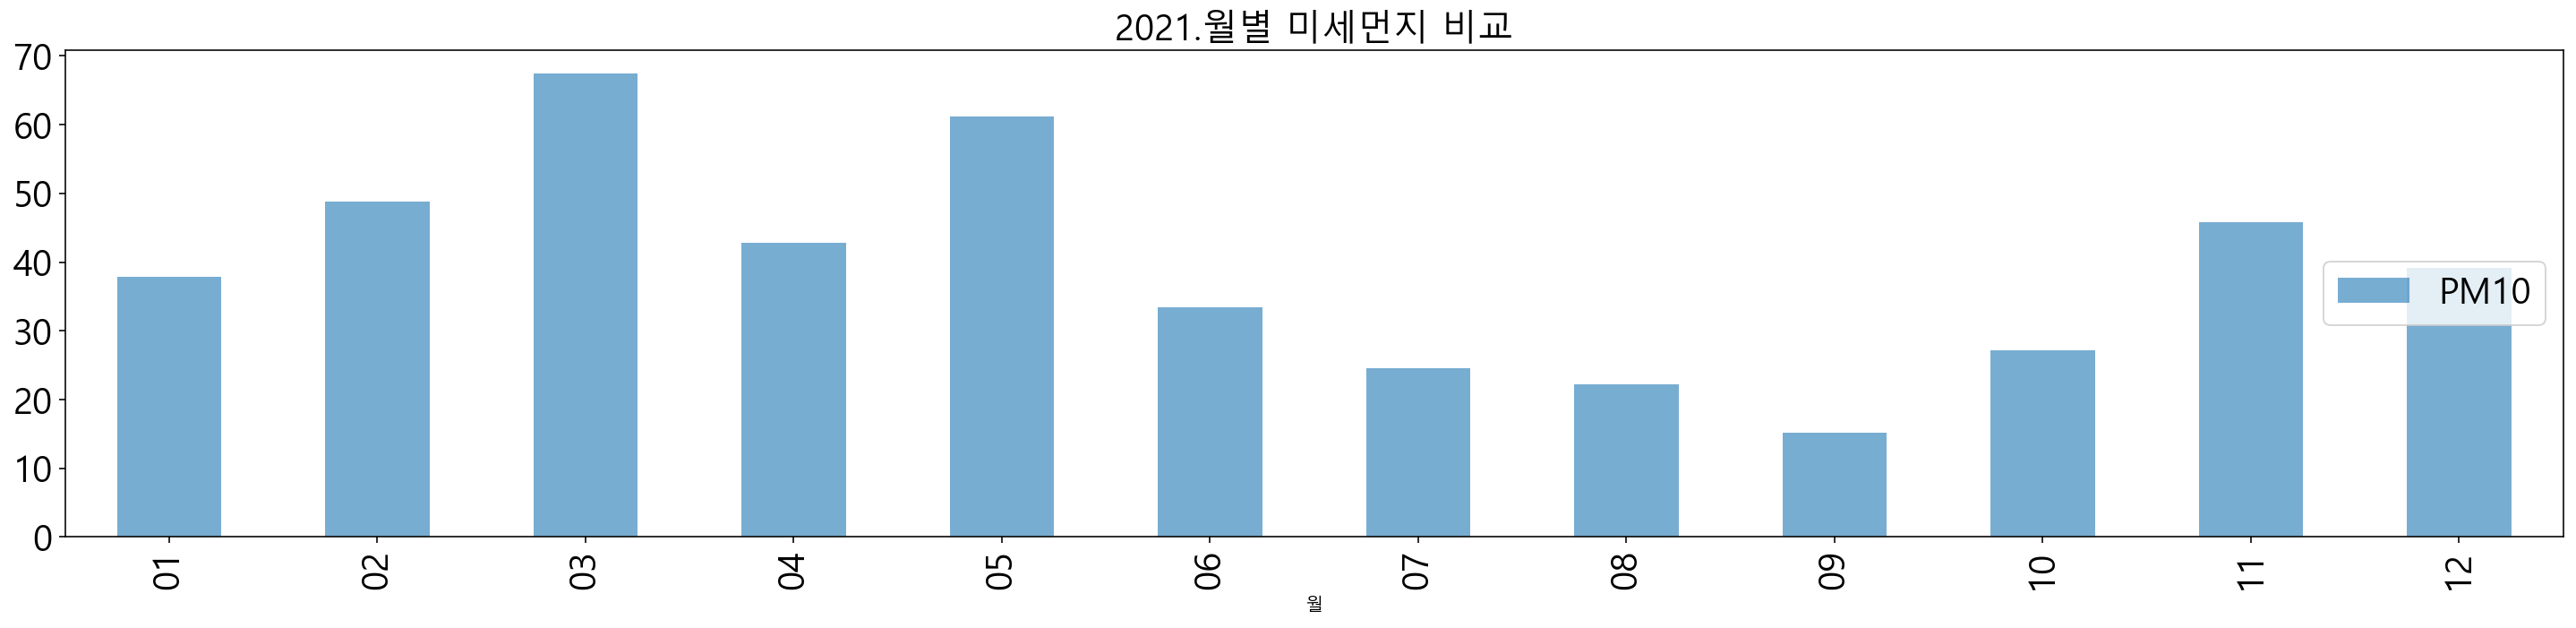

In [30]:
df_month_pm10.plot(kind='bar',figsize=(25,5),fontsize=20,alpha=0.6,x='월')
plt.title('2021.월별 미세먼지 비교',fontsize=20)
plt.legend(loc='right',fontsize=20)
plt.show()

# 3월과 5월이 가장 높다는 것을 알 수 있다.

In [257]:
# 확인하기
df_month_pm10

,월,PM10
0,01,37.87
1,02,48.78
2,03,67.49
3,04,42.85
4,05,61.15
5,06,33.37
6,07,24.57
7,08,22.16
8,09,15.18
9,10,27.17


 - 3월과 5월이 미세먼지가 가장 높고, 9월과 8월이 가장 낮은 것을 알 수 있다.

In [31]:
# 3월과 5월의 시간별, 일별 미세먼지 비교하기
# 3월과 5월의 대기오염물질 비교하기

df_3_t = df_March.groupby(["시간"])["PM10"].mean().round(2) # 시간별 평균 구하기
df_3_t = df_3_t.reset_index()

df_5_t = df_May.groupby(["시간"])["PM10"].mean().round(2) # 시간별 평균 구하기
df_5_t = df_5_t.reset_index()

df_3_d = df_March.groupby(["일"])["PM10"].mean().round(2) # 시간별 평균 구하기
df_3_d = df_3_d.reset_index()

df_5_d = df_May.groupby(["일"])["PM10"].mean().round(2) # 시간별 평균 구하기
df_5_d = df_5_d.reset_index()

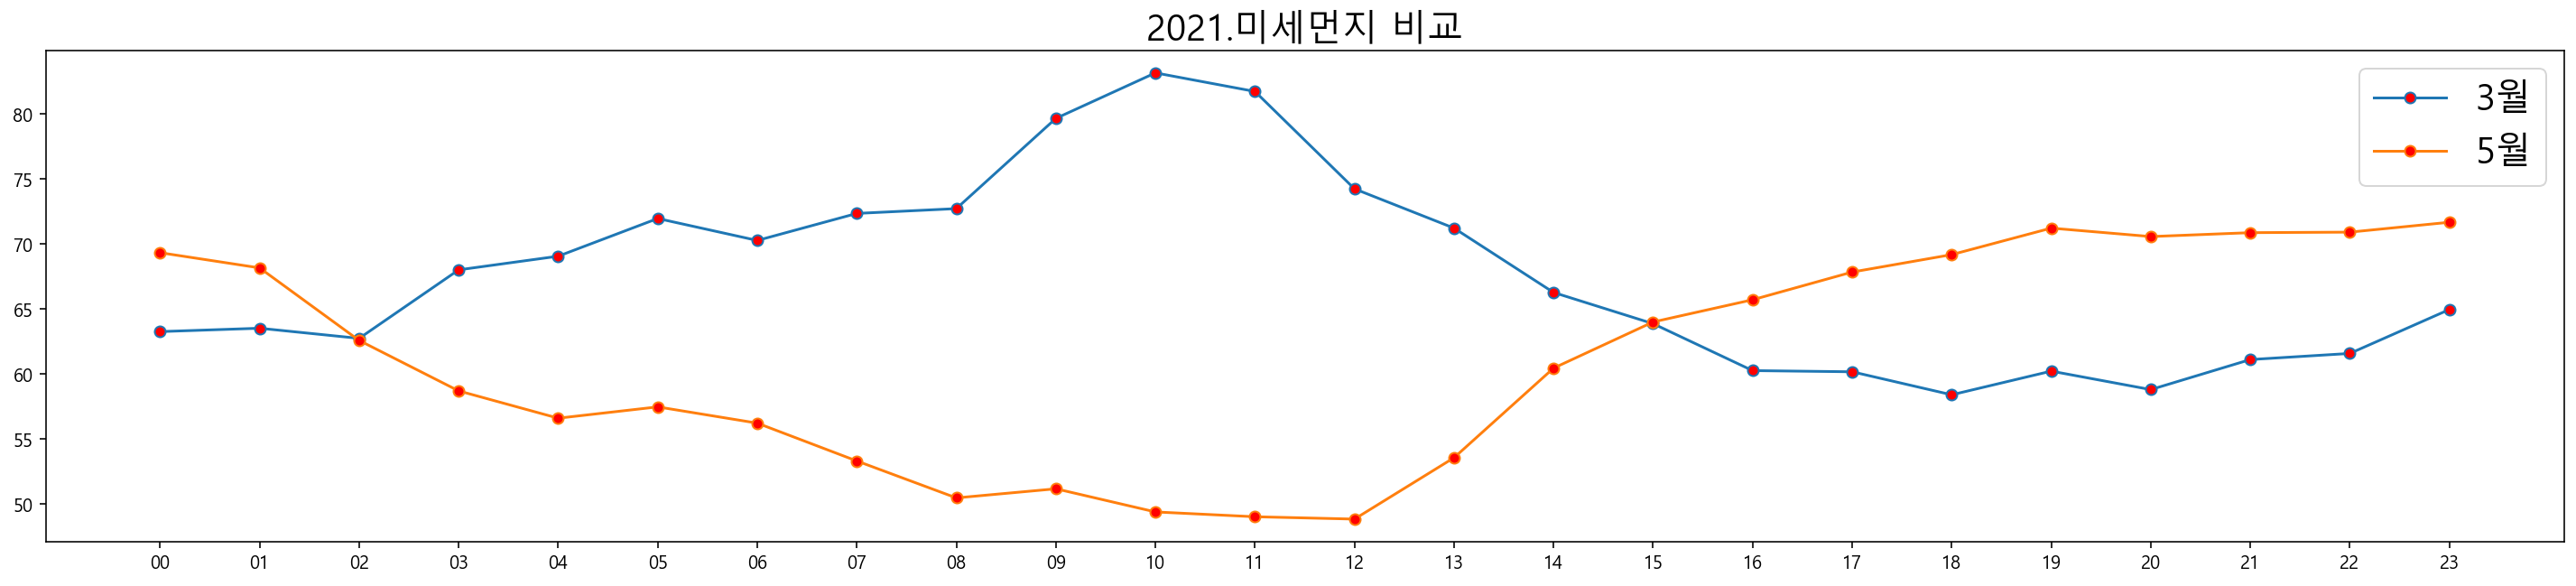

In [32]:
# 3,5월 24시간대별로 확인하기

plt.figure(figsize=(25,5))
g1 = plt.plot(df_3_t['시간'],df_3_t["PM10"],marker='o',markerfacecolor='red',label='3월')
g2 = plt.plot(df_5_t['시간'],df_5_t["PM10"],marker='o',markerfacecolor='red',label='5월')

plt.title('2021.미세먼지 비교',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# 3월과 5월 그래프가 반대의 모습을 보이고 있다는 것을 알 수 있다.
# 3월은 미세먼지가 오전에 높으며, 오후에 낮다.
# 5월은 미세먼지가 오전에 낮으며, 오후에 높다.

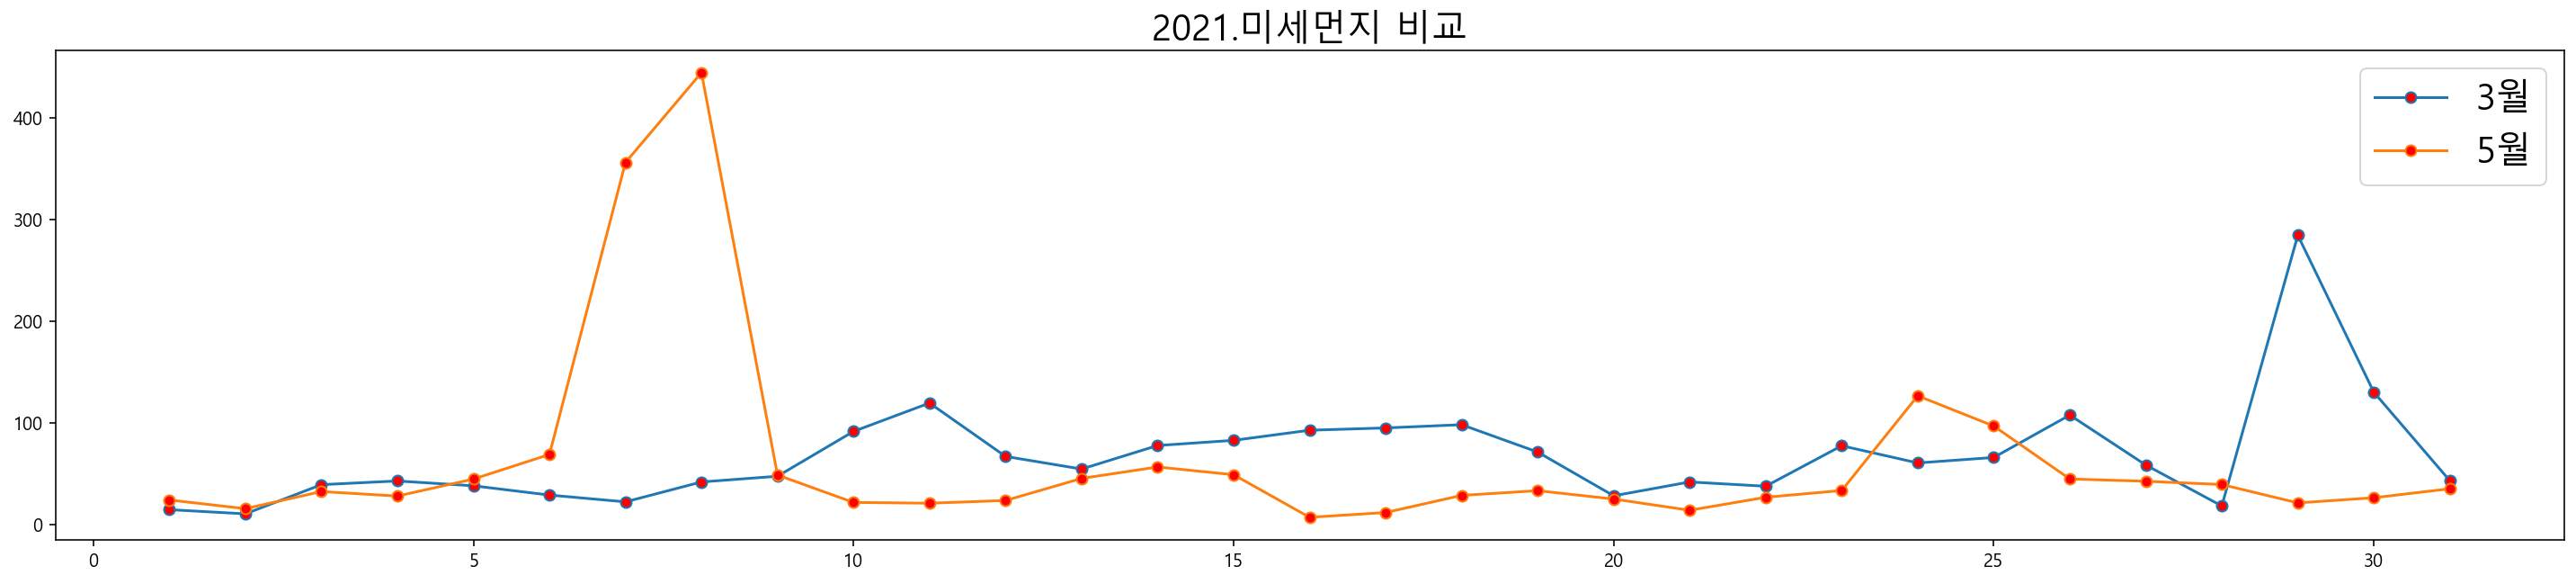

In [33]:
# 3,5월 일별로 확인하기

plt.figure(figsize=(25,5))
g1 = plt.plot(df_3_d['일'],df_3_d["PM10"],marker='o',markerfacecolor='red',label='3월')
g2 = plt.plot(df_5_d['일'],df_5_d["PM10"],marker='o',markerfacecolor='red',label='5월')

plt.title('2021.미세먼지 비교',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# 3월은 25 ~ 30사이에 가장 높았고, 5월은 5 ~ 10일 사이에 가장 높았다.

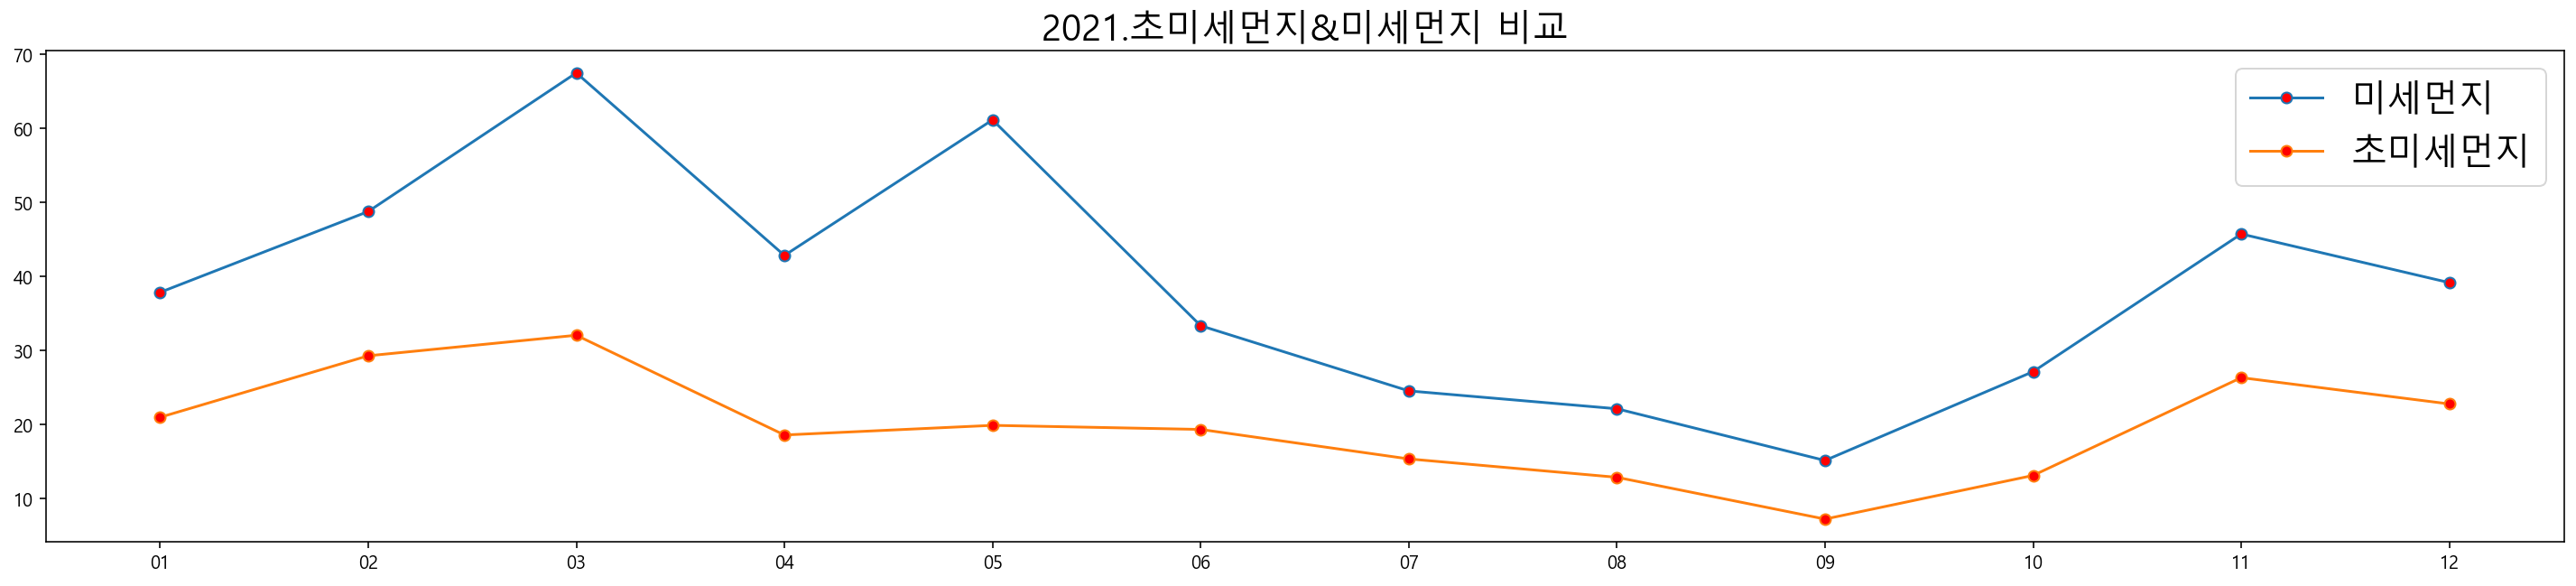

In [35]:
# 미세먼지, 초미세먼지 확인하기

plt.figure(figsize=(25,5))
g1 = plt.plot(df_month_pm10['월'],df_month_pm10["PM10"],marker='o',markerfacecolor='red',label='미세먼지')
g2 = plt.plot(df_month_PM25['월'],df_month_PM25["PM25"],marker='o',markerfacecolor='red',label='초미세먼지')

plt.title('2021.초미세먼지&미세먼지 비교',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# 미세먼지와 초미세먼지의 그래프 증감율이 비슷하다는 것을 알 수 있다.

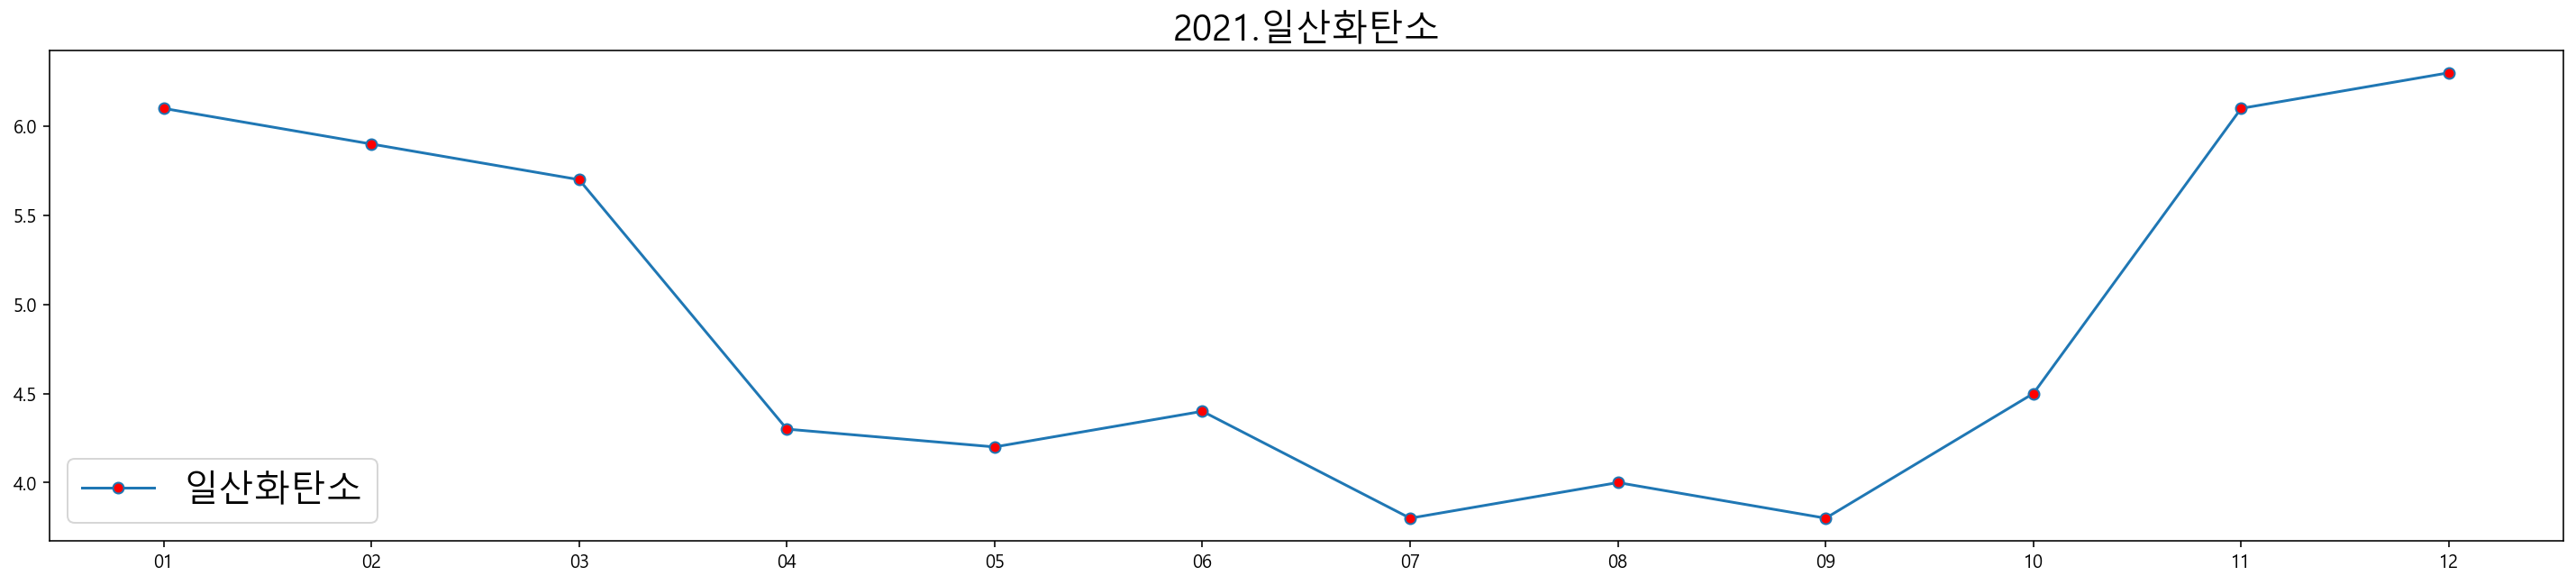

In [34]:
# 일산화탄소는 평균적으로 수치가 낮아서 미세먼지와 같이 비교하면 시각화가 어렵기 때문에 따로 비교하기
plt.figure(figsize=(25,5))
g1 = plt.plot(df_month_CO['월'],df_month_CO["CO"]*10,marker='o',markerfacecolor='red',label='일산화탄소')
plt.title('2021.일산화탄소',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# 미세먼지와 비슷하게 7 ~ 9월에 낮다가 다시 높아졌다.

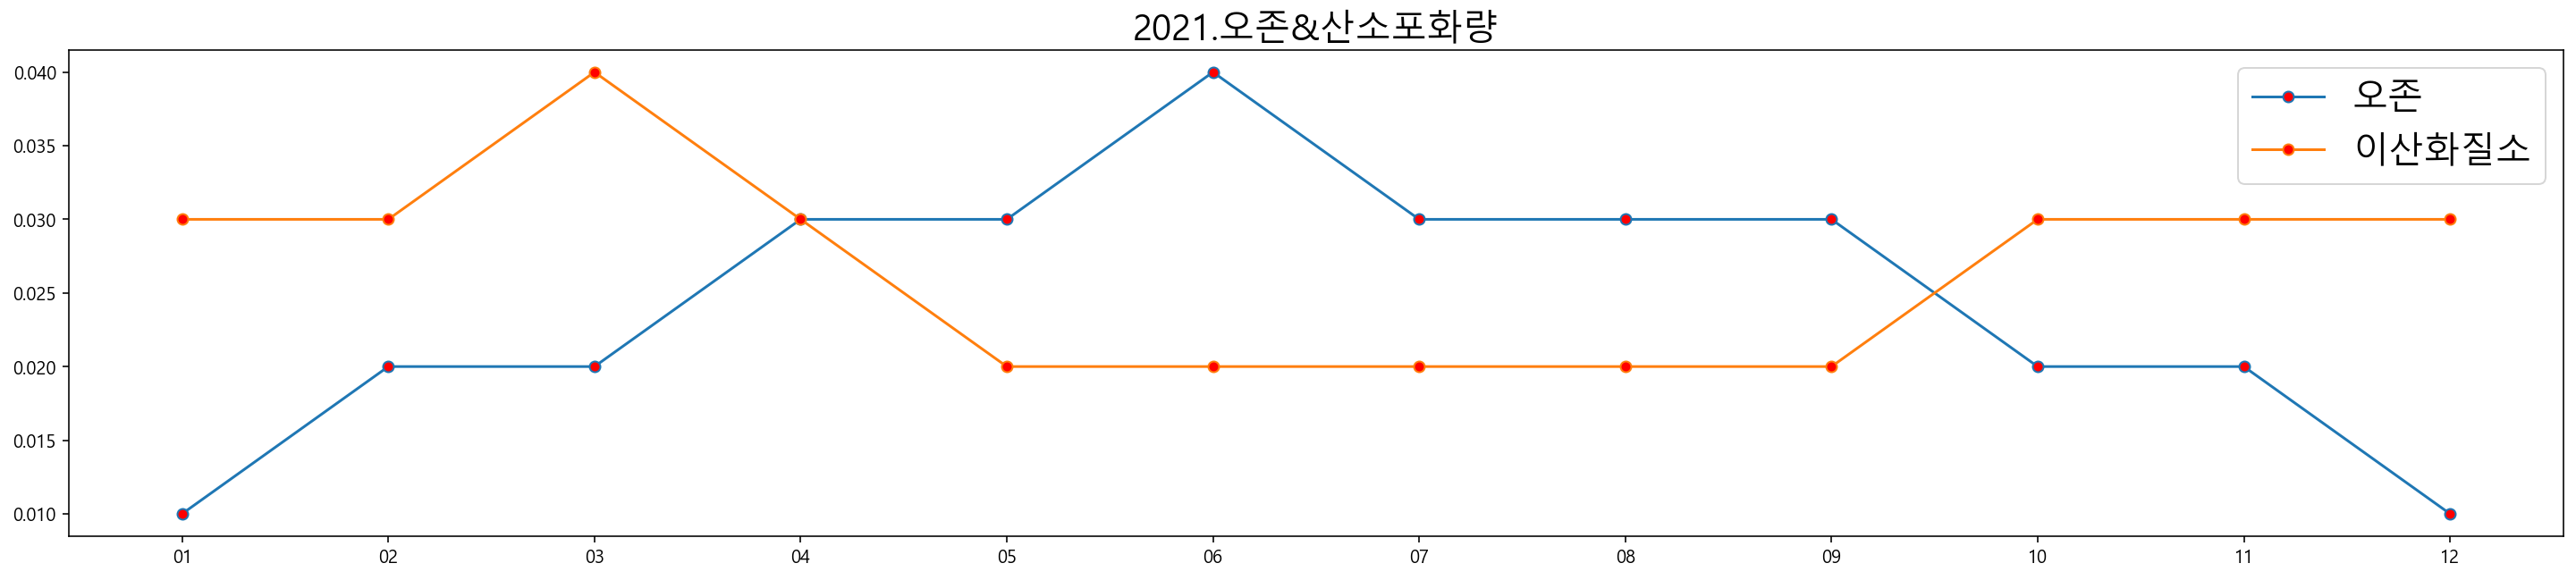

In [44]:
# 오존 & 이산화질소

plt.figure(figsize=(25,5))
g1 = plt.plot(df_month_O3['월'],df_month_O3["O3"],marker='o',markerfacecolor='red',label='오존')
g2 = plt.plot(df_month_NO2['월'],df_month_NO2["NO2"],marker='o',markerfacecolor='red',label='이산화질소')


plt.title('2021.오존&이산화질소',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# 오존과 이산화질소는 반대의 모양을 보여준다.

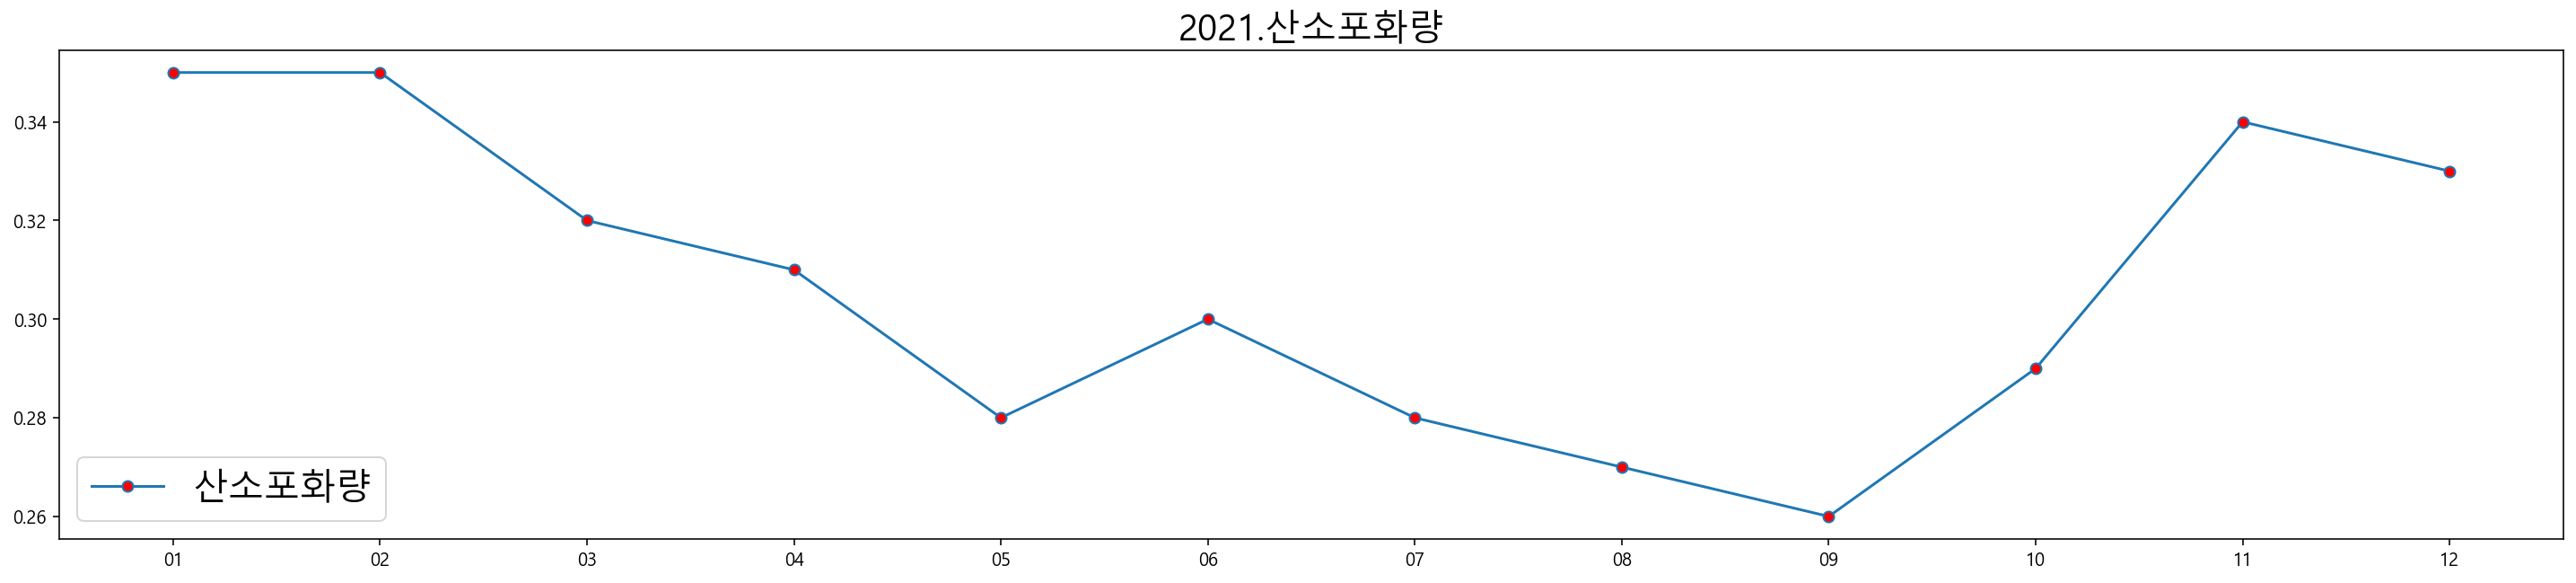

In [65]:
plt.figure(figsize=(25,5))
g1 = plt.plot(df_month_SO2['월'],df_month_SO2["SO2"],marker='o',markerfacecolor='red',label='산소포화량')

plt.title('2021.산소포화량',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# 10 ~ 4월까지 높으며, 5 ~ 9월까지 낮다.

#### 결론
- 2021년의 미세먼지는 3월과 5월에 가장 높다는 것을 알 수 있다.
- 2021년의 미세먼지는 9월과 8월이 가장 낮은 것을 알 수 있다.
- 오존은 미세먼지 수치 그래프와 다른 모양새를 가지고 있다. -> 미세먼지가 높을 때 오존은 낮으며, 미세먼지가 낮으면 오존은 높다.
- 일산화탄소, 산소포화량, 이산화질소는 미세먼지 수치 그래프와 비슷한 모양새를 가지고 있다.
- 미세먼지가 3월과 5월에 가장 높더라도 높은 시간대는 각각 다르다.
- 3월은 미세먼지가 오전에 높으며, 오후에 낮다.
- 5월은 미세먼지가 오전에 낮으며, 오후에 높다.
